Car Sales in Mexico

In [292]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns

# URL from Excel file
url_InegiCars = "https://www.inegi.org.mx/contenidos/datosprimarios/iavl/tabulados/8_Ventas_serie.xlsx"

# Read file from url 
df_CarsMex = pd.read_excel(url_InegiCars, header=5)  
last_row = df_CarsMex.iloc[-5]

# Print the data 
print(df_CarsMex.head())
print(last_row)

                            Tema     Año    Mes  Marca         Modelo  \
0  Venta al público de vehículos  2005.0  Enero  Acura            Mdx   
1  Venta al público de vehículos  2005.0  Enero  Acura             Rl   
2  Venta al público de vehículos  2005.0  Enero  Acura        Tl 3.5l   
3  Venta al público de vehículos  2005.0  Enero   Audi             A3   
4  Venta al público de vehículos  2005.0  Enero   Audi  A4 1.8 Cabrio   

               Tipo Segmento     Origen     País origen Cantidad  
0  Camiones ligeros    SUV's  Importado          Canadá       18  
1       Automóviles  De Lujo  Importado           Japón        4  
2       Automóviles  De Lujo  Importado  Estados Unidos       38  
3       Automóviles  De Lujo  Importado          Brasil       74  
4       Automóviles  De Lujo  Importado        Alemania        9  
Tema           Venta al publico de vehículos
Año                                   2024.0
Mes                                    Marzo
Marca                   

In [294]:
# Convert "Cantidad" column into numeric
df_CarsMex['Cantidad'] = pd.to_numeric(df_CarsMex['Cantidad'], errors='coerce')

# Group the data by segments
sum_by_segment = df_CarsMex.groupby('Segmento')['Cantidad'].sum()
print(sum_by_segment)

Segmento
Compactos       4984017.0
De Lujo          917018.0
Deportivos       157846.0
Minivans         438385.0
Pick Ups        3534207.0
SUV's           5100065.0
Subcompactos    6949016.0
Name: Cantidad, dtype: float64


{2019: Segmento
Compactos       261733.0
De Lujo          47156.0
Deportivos        7667.0
Minivans         16952.0
Pick Ups        193536.0
SUV's           343650.0
Subcompactos    447237.0
Name: Cantidad, dtype: float64, 2020: Segmento
Compactos       210929.0
De Lujo          31249.0
Deportivos        5674.0
Minivans          9916.0
Pick Ups        155411.0
SUV's           252303.0
Subcompactos    284581.0
Name: Cantidad, dtype: float64, 2021: Segmento
Compactos       202332.0
De Lujo          28655.0
Deportivos        5276.0
Minivans         14664.0
Pick Ups        161438.0
SUV's           318521.0
Subcompactos    283849.0
Name: Cantidad, dtype: float64, 2022: Segmento
Compactos       213032.0
De Lujo          30142.0
Deportivos        4917.0
Minivans         24076.0
Pick Ups        189732.0
SUV's           393958.0
Subcompactos    238871.0
Name: Cantidad, dtype: float64, 2023: Segmento
Compactos       276597.0
De Lujo          35083.0
Deportivos        6017.0
Minivans         2505

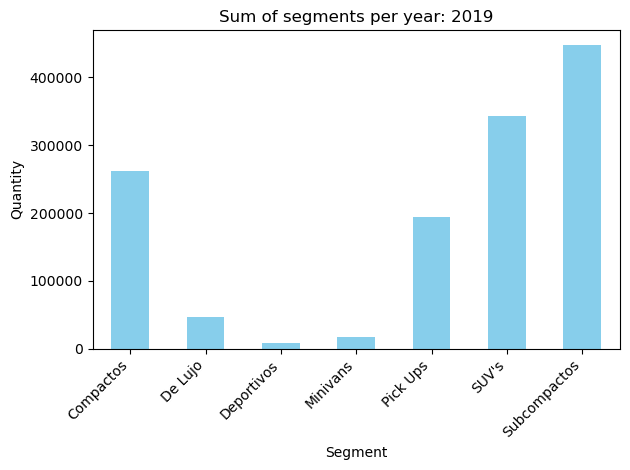

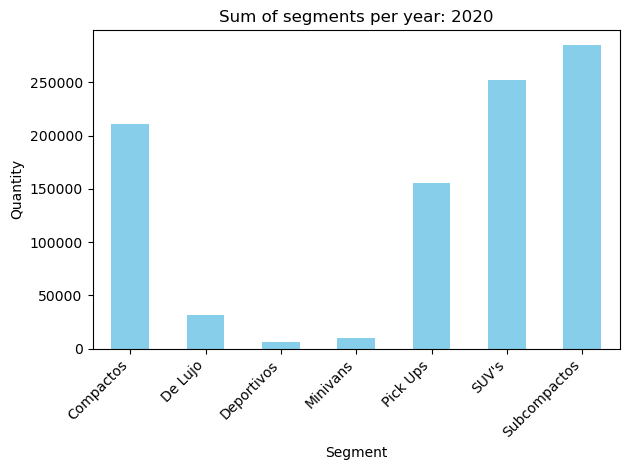

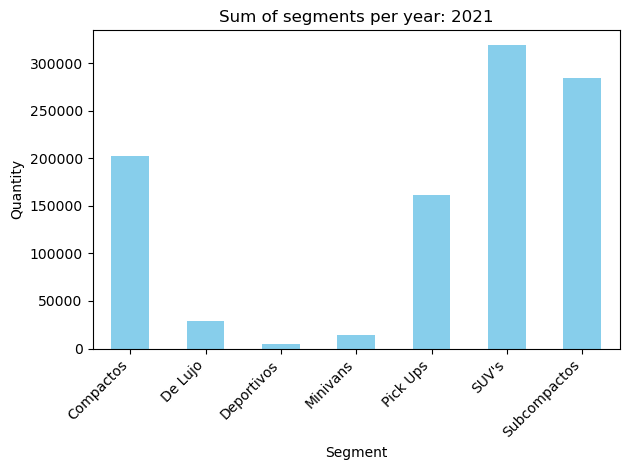

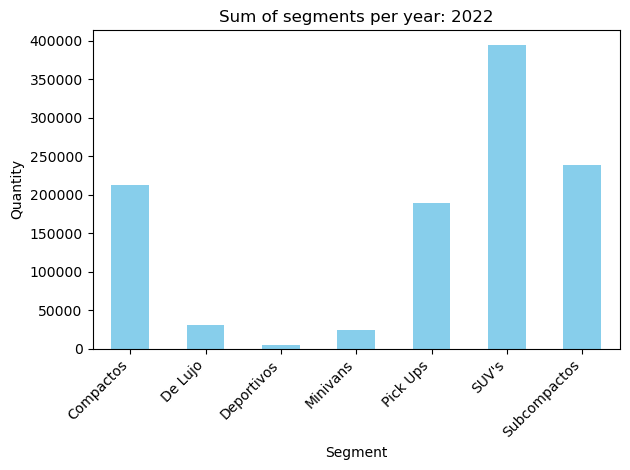

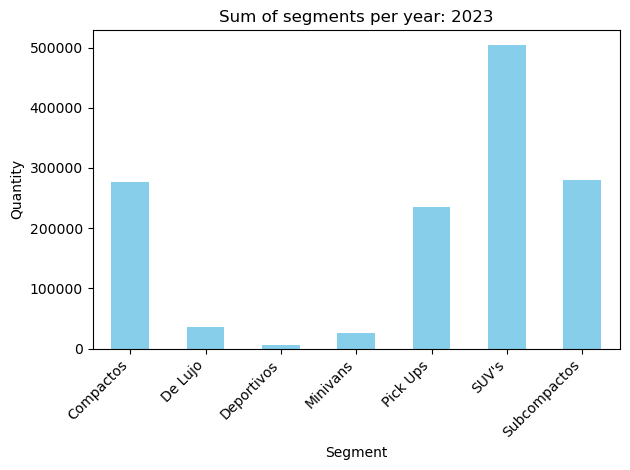

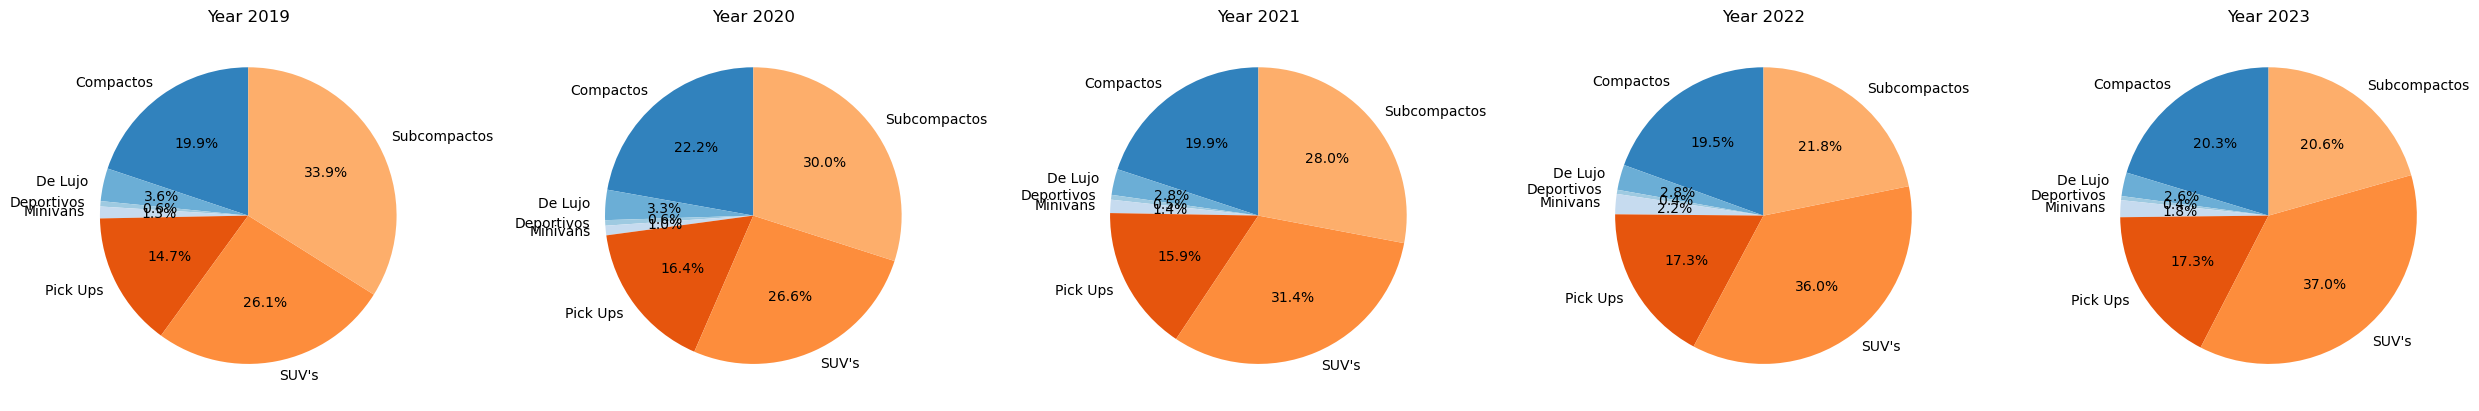

In [295]:
# Interest years
interest_years = [2019, 2020, 2021, 2022, 2023]

# Create a dictionary to store volume by selected years
volume_by_year = {}

# Iterate over the interest years
for year in interest_years:
    year_data = df_CarsMex[df_CarsMex['Año'] == year]
    
    # Group by segments
    segment_count_year = year_data.groupby('Segmento')['Cantidad'].sum()
    volume_by_year[year] = segment_count_year

print(volume_by_year)

# Create a bar chart for each year
for year, segment_count_year in volume_by_year.items():
    plt.figure()
    segment_count_year.plot(kind='bar', color='skyblue')
    plt.title(f'Sum of segments per year: {year}')
    plt.xlabel('Segment')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

# Create the chart
plt.figure(figsize=(25, 6))

# Iterate over the years and create pie charts
for year, segment_count_year in volume_by_year.items():
    plt.subplot(1, len(interest_years), list(volume_by_year.keys()).index(year) + 1)
    plt.pie(segment_count_year, labels=segment_count_year.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Year {year}')

# Adjust spaces between the pie charts
plt.tight_layout()

# Show the charts
plt.show()

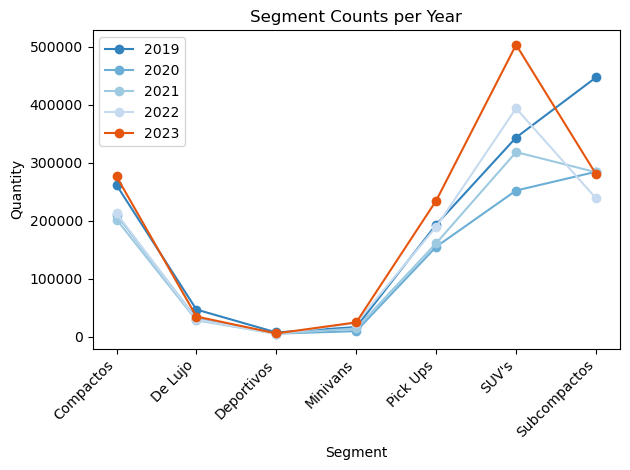

In [299]:
# Iterate over the years and plot segment counts
for year, segment_count_year in volume_by_year.items():
    plt.plot(segment_count_year.index, segment_count_year.values, label=str(year), marker='o')

# Add title and axis labels
plt.title('Segment Counts per Year')
plt.xlabel('Segment')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [301]:
# Interest years
interest_years = [2005, 2010, 2015, 2020, 2023]

# Create a dictionary to store segment counts per year
count_by_year = {}

# Iterate over the interest years
for year in interest_years:
    # Filter data for the current year
    year_data = df_CarsMex[df_CarsMex['Año'] == year]
    
    # Group by segment and sum the corresponding quantity
    segment_counts_year = year_data.groupby('Segmento')['Cantidad'].sum()
    
    count_by_year[year] = segment_counts_year

print(count_by_year)

{2005: Segmento
Compactos       215653.0
De Lujo          42527.0
Deportivos        7190.0
Minivans         53374.0
Pick Ups        199321.0
SUV's           165062.0
Subcompactos    448641.0
Name: Cantidad, dtype: float64, 2010: Segmento
Compactos       214976.0
De Lujo          37183.0
Deportivos       11884.0
Minivans         18225.0
Pick Ups        150157.0
SUV's           148276.0
Subcompactos    239712.0
Name: Cantidad, dtype: float64, 2015: Segmento
Compactos       313728.0
De Lujo          62686.0
Deportivos       10264.0
Minivans         14311.0
Pick Ups        180073.0
SUV's           280079.0
Subcompactos    493303.0
Name: Cantidad, dtype: float64, 2020: Segmento
Compactos       210929.0
De Lujo          31249.0
Deportivos        5674.0
Minivans          9916.0
Pick Ups        155411.0
SUV's           252303.0
Subcompactos    284581.0
Name: Cantidad, dtype: float64, 2023: Segmento
Compactos       276597.0
De Lujo          35083.0
Deportivos        6017.0
Minivans         2505

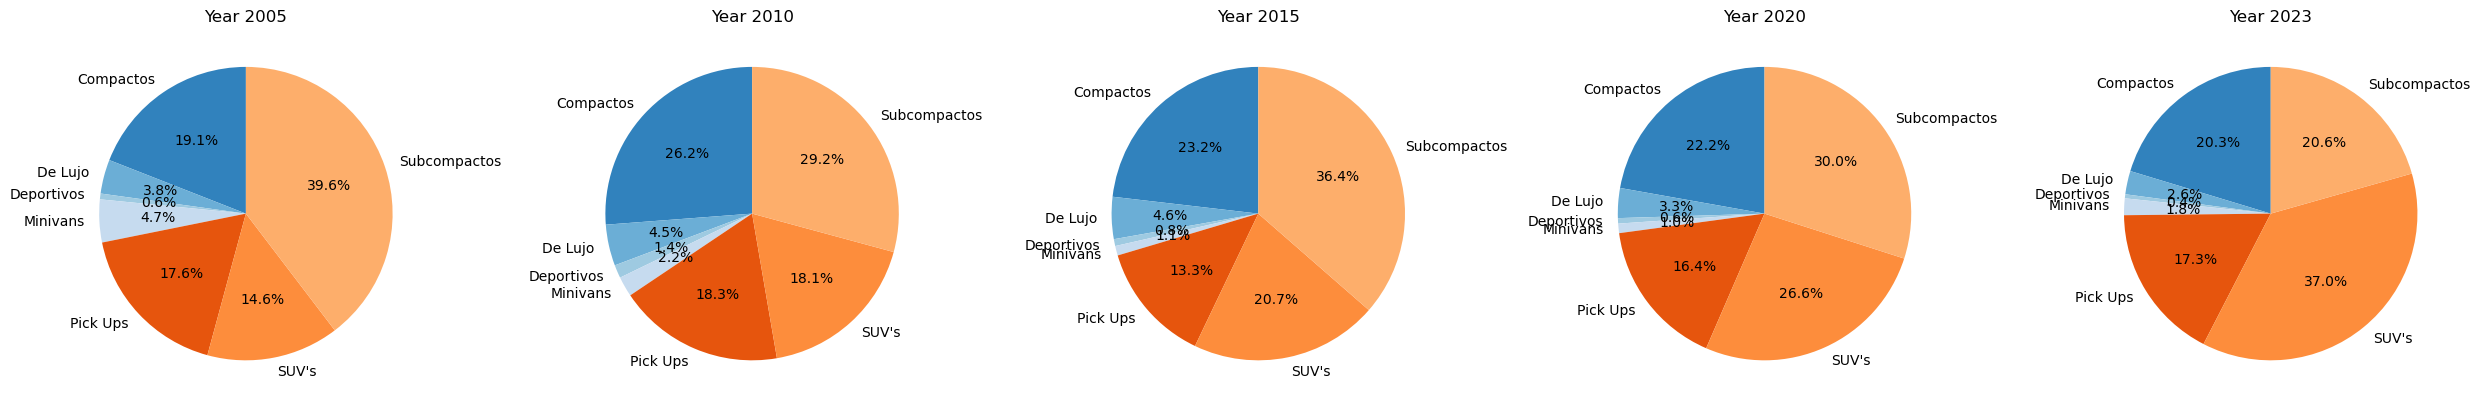

In [302]:
# Create the figure and the axis
plt.figure(figsize=(25, 6))

# Iterate over the years and create pie charts for the volumes
for year, segment_counts_year in count_by_year.items():
    plt.subplot(1, len(interest_years), list(count_by_year.keys()).index(year) + 1)
    plt.pie(segment_counts_year, labels=segment_counts_year.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Year {year}')

# Adjust spaces between the charts
plt.tight_layout()

# Show the charts
plt.show()

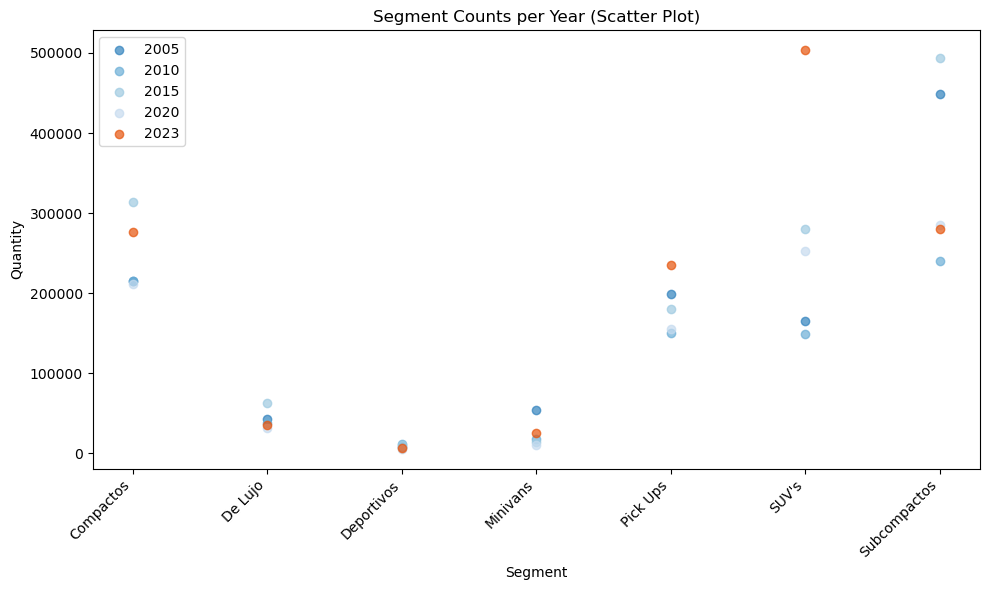

In [303]:
# Create the chart
plt.figure(figsize=(10, 6))

# Iterate over the years and create a scatter plot
for year, segment_counts_year in count_by_year.items():
    plt.scatter(segment_counts_year.index, segment_counts_year.values, label=str(year), alpha=0.7)

# Add title and labels
plt.title('Segment Counts per Year (Scatter Plot)')
plt.xlabel('Segment')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()

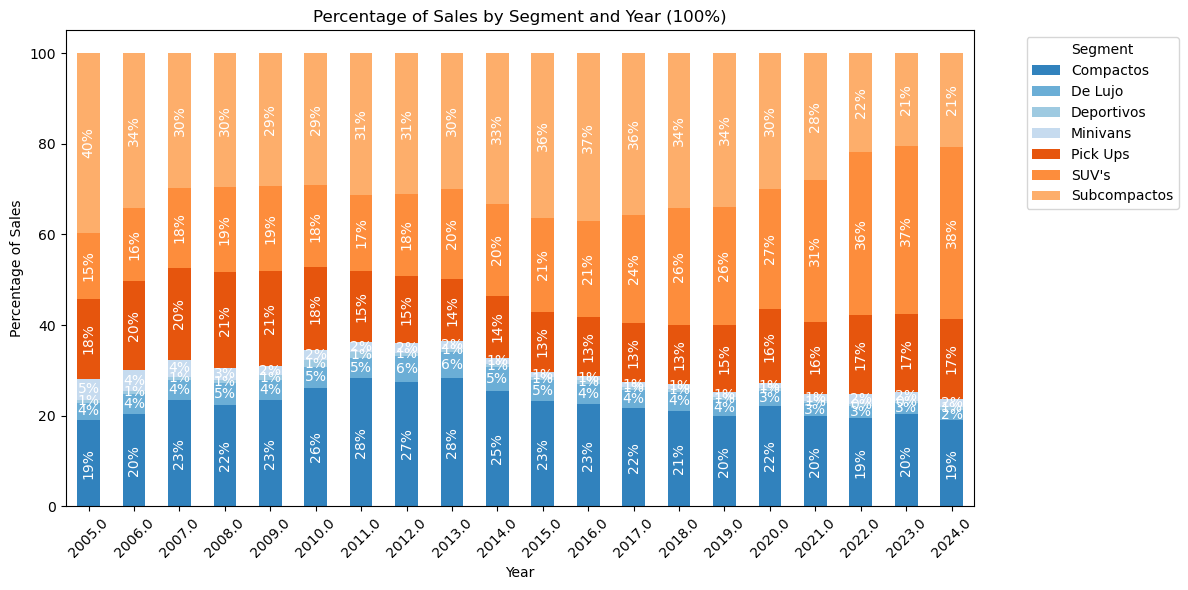

In [304]:
# Calculate total sales per year
sales_per_year = df_CarsMex.groupby('Año')['Cantidad'].sum()

# Group by year and segment, and sum the sales
sales_per_segment_year = df_CarsMex.groupby(['Año', 'Segmento'])['Cantidad'].sum().unstack()

# Calculate the percentage of sales for each segment by year
percentage_sales = sales_per_segment_year.div(sales_per_year, axis=0) * 100

# Plot the bar chart with percentages
ax = percentage_sales.plot(kind='bar', stacked=True, figsize=(12, 6))

# Annotate each bar with its percentage
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height < 9:
        ax.annotate('{:.0f}%'.format(height), (x + width / 2, y + height / 2), ha='center', va='center', color='white')
    else:
        ax.annotate('{:.0f}%'.format(height), (x + width / 2, y + height / 2), ha='center', va='center', color='white', rotation='vertical')

plt.title('Percentage of Sales by Segment and Year (100%)')
plt.xlabel('Year')
plt.ylabel('Percentage of Sales')
plt.xticks(rotation=45)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [305]:
# Convert the 'Cantidad' column to numeric type
df_CarsMex['Quantity'] = pd.to_numeric(df_CarsMex['Cantidad'], errors='coerce') 

# Drop rows with NaN values in the 'Cantidad' column
df_CarsMex = df_CarsMex.dropna(subset=['Cantidad']) 

# Create a DataFrame with columns for total sales: Year, Quantity
sales_per_year_df = pd.DataFrame(df_CarsMex.groupby(df_CarsMex["Año"])["Cantidad"].sum())
sales_per_year_df.reset_index(drop=False, inplace=True)

# Format 'Quantity' column with commas and no decimals
sales_per_year_df['Año'] = sales_per_year_df['Año'].astype(int)
sales_per_year_df['Cantidad'] = sales_per_year_df['Cantidad'].astype(int)

# Drop the row corresponding to the year 2024
sales_per_year_df = sales_per_year_df.drop(19)
sales_per_year_df

,Año,Cantidad
0,2005,1131768
1,2006,1139736
2,2007,1099890
3,2008,1025544
4,2009,754925
5,2010,820413
6,2011,905893
7,2012,988042
8,2013,1065098
9,2014,1136965


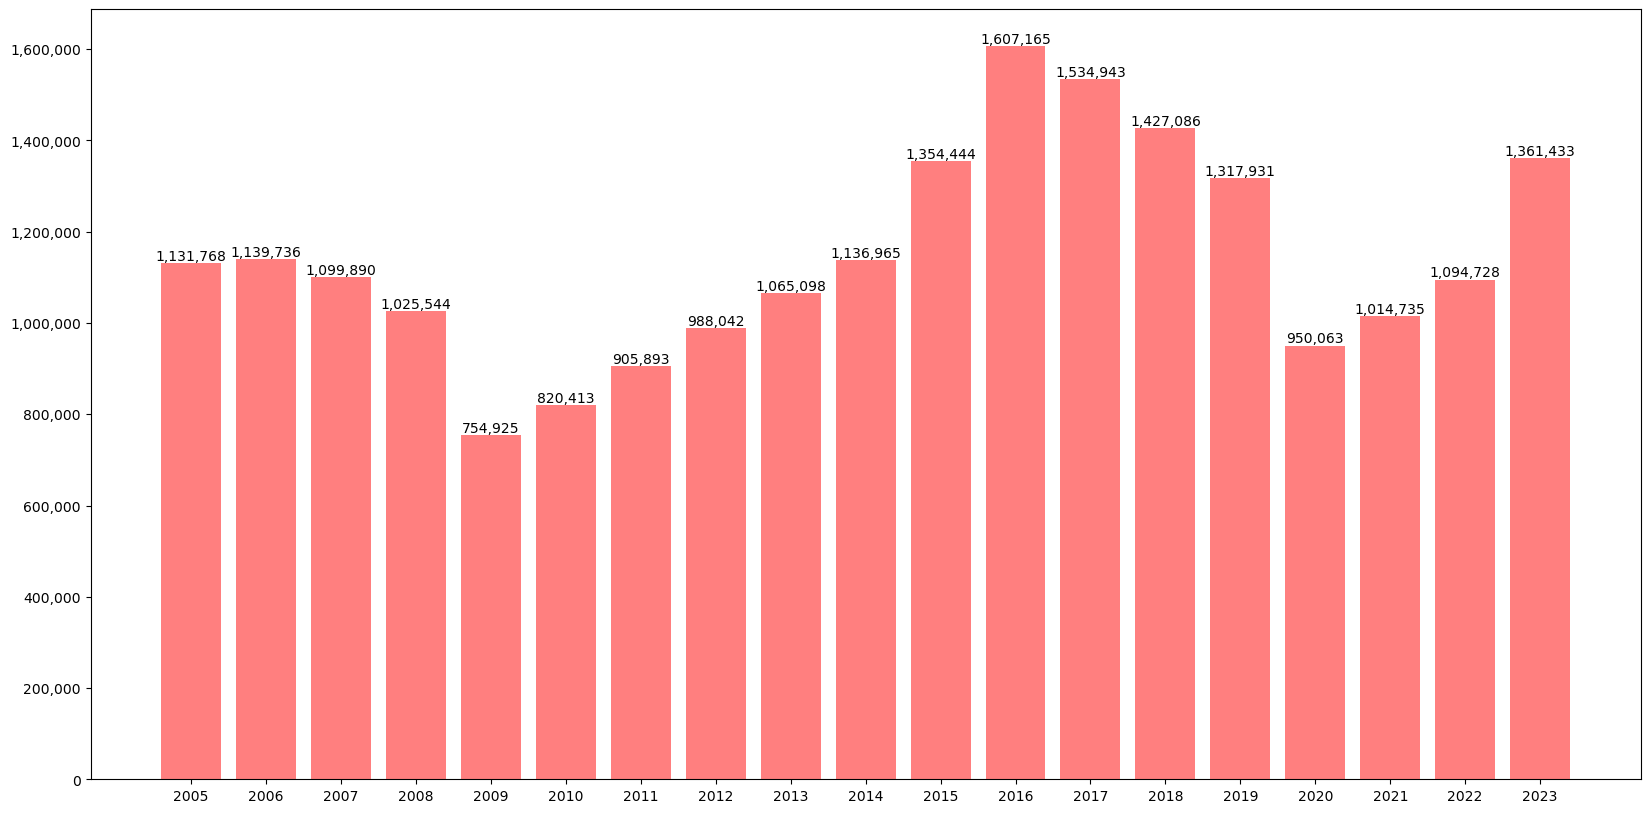

In [307]:
# Set x axis and tick locations
x_axis = np.arange(len(sales_per_year_df))
tick_locations = [value for value in x_axis]
labels = sales_per_year_df["Cantidad"]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
bars = plt.bar(x_axis, sales_per_year_df["Cantidad"], color='r', alpha=0.5, align="center")

# Format y-axis labels with comma separator
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Format labels on bars with comma separator
for bar, label in zip(bars, labels):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:,.0f}'.format(label), ha='center', va='bottom')

plt.xticks(tick_locations, sales_per_year_df["Año"])
plt.show()

In [309]:
# Group the data by brand and sum the sales for each brand
sales_by_brand = df_CarsMex.groupby('Marca')['Cantidad'].sum()

# Sort the sales by brand in descending order
sales_by_brand = sales_by_brand.sort_values(ascending=False)

# Convert the Series into a DataFrame
df_sales_by_brand = sales_by_brand.reset_index()

# Add 1 to the index so it starts from 1
df_sales_by_brand.index += 1

# Rename the sales column
df_sales_by_brand.columns = ['Brand', 'Sales']

# Show the top 5 selling brands
df_sales_by_brand.head(5)

,Brand,Sales
1,Nissan,4822867.0
2,General Motors,3952442.0
3,Volkswagen,2630230.0
4,Ford Motor,1725011.0
5,Chrysler,1560869.0


In [310]:
# Create a dictionary to store DataFrames by year
results_by_year = {}

# Iterate from year 2023 to 2013
for year in range(2023, 2012, -1):
    # Filter the data for the current year
    sales_year = df_CarsMex[df_CarsMex['Año'] == year]
    # Group the filtered data by brand and sum the sales for each brand
    sales_by_brand_year = sales_year.groupby('Marca')['Cantidad'].sum()
    # Sort the sales by brand in descending order
    sales_by_brand_year = sales_by_brand_year.sort_values(ascending=False)
    # Convert the Series into a DataFrame, reset index without dropping the old index
    df_sales_by_brand_year = sales_by_brand_year.reset_index().reset_index(drop=True)
    # Add 1 to the index
    df_sales_by_brand_year.index += 1
    # Rename the sales column
    df_sales_by_brand_year.columns = ['Brand', 'Sales']
    # Add an additional column for the year
    df_sales_by_brand_year['Year'] = year
    # Store the DataFrame in the dictionary
    results_by_year[year] = df_sales_by_brand_year

# Show each DataFrame by year
for year, df in results_by_year.items():
    # Assign each DataFrame to a variable with the corresponding year name
    globals()[f'df_results_{year}'] = df

# Show the created variables
df_results_2023

,Brand,Sales,Year
1,Nissan,241056.0,2023
2,General Motors,184051.0,2023
3,Volkswagen,113975.0,2023
4,Toyota,104113.0,2023
5,KIA,93490.0,2023
6,Mazda,76017.0,2023
7,Chrysler,71376.0,2023
8,MG Motor,60128.0,2023
9,Hyundai,49757.0,2023
10,Ford Motor,47968.0,2023


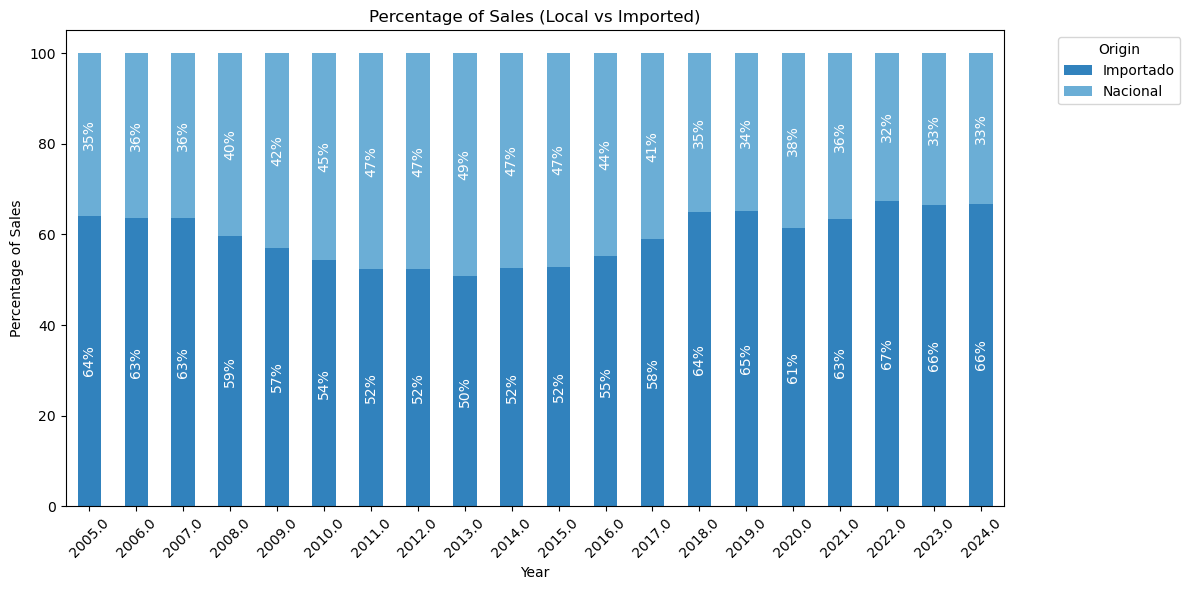

In [313]:
# Group by year and origin, and sum the sales
sales_by_origin_year = df_CarsMex.groupby(['Año', 'Origen'])['Cantidad'].sum().unstack()

# Calculate the total sales per year
total_sales_per_year = sales_by_origin_year.sum(axis=1)

# Calculate the percentage of sales for each origin by year
percentage_sales = sales_by_origin_year.div(total_sales_per_year, axis=0) * 100

# Plot the stacked bar chart
ax = percentage_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Percentage of Sales (Local vs Imported)')
plt.xlabel('Year')
plt.ylabel('Percentage of Sales')
plt.xticks(rotation=45)
plt.legend(title='Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', rotation=90, color='white')

plt.show()

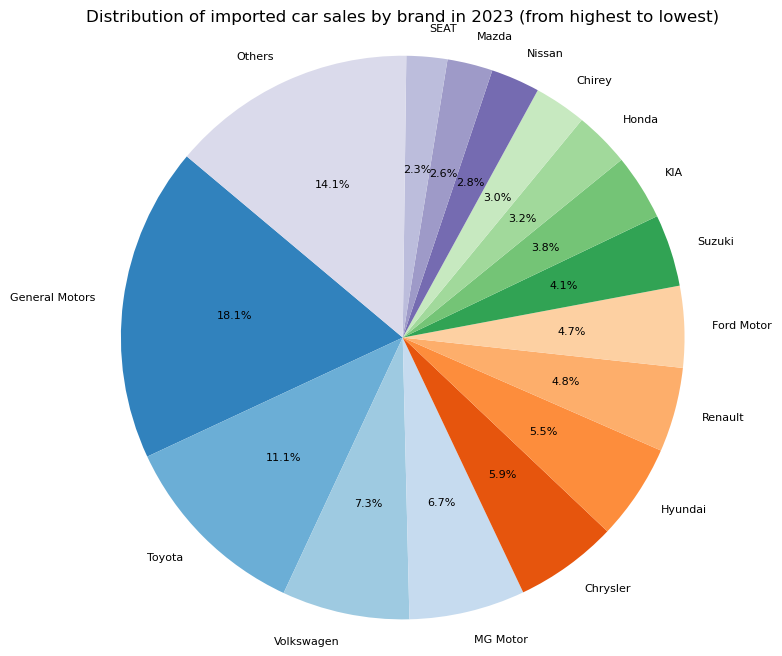

In [315]:
# Filter imported car sales in 2023
imported_car_sales_2023 = df_CarsMex[(df_CarsMex['Origen'] == 'Importado') & (df_CarsMex['Año'] == 2023)]

# Group by brand and sum the sales
sales_by_brand = imported_car_sales_2023.groupby('Marca')['Cantidad'].sum()

# Sort sales by brand from highest to lowest
sales_by_brand_sorted = sales_by_brand.sort_values(ascending=False)

# Filter the main brands and group the rest into "Others"
main_brands = sales_by_brand_sorted.head(15)
others = pd.Series(sales_by_brand_sorted[15:].sum(), index=['Others'])

# Combine the main brands with "Others"
final_sales_by_brand = pd.concat([main_brands, others])

# Create the pie chart with the main brands and "Others"
plt.figure(figsize=(8, 8))
plt.pie(final_sales_by_brand, labels=final_sales_by_brand.index, startangle=140, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Distribution of imported car sales by brand in 2023 (from highest to lowest)')
plt.axis('equal')
plt.show()

In [ ]:
# Filter national car sales in 2023
ventas_nacionales_2024 = df_CarsMex[(df_CarsMex['Origen'] == 'Nacional') & (df_CarsMex['Año'] == 2023)]
# Group by brand and sum the sales
ventas_por_marca_nacionales = ventas_nacionales_2024.groupby('Marca')['Cantidad'].sum()
# Sort sales by brand from highest to lowest
ventas_por_marca_nacionales_sorted = ventas_por_marca_nacionales.sort_values(ascending=False)
# Filter the main brands and group the rest into "Others"
marcas_principales_nacionales = ventas_por_marca_nacionales_sorted.head(8)
otros_nacionales = pd.Series(ventas_por_marca_nacionales_sorted[8:].sum(), index=['Otros'])
# Combine the main brands with "Others"
ventas_por_marca_final_nacionales = pd.concat([marcas_principales_nacionales, otros_nacionales])
# Create the pie chart with the main brands and "Others" for national cars in 2024
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_marca_final_nacionales, labels=ventas_por_marca_final_nacionales.index, startangle=140, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Distribution of national car sales by brand in 2023 (from highest to lowest)')
plt.axis('equal')
plt.show()

In [ ]:
# Grouping by model per year
Quantity_year_model = df_CarsMex.groupby(['Año', 'Modelo', 'País origen'])['Cantidad'].sum()

In [ ]:
# Converting the series into a data frame
Quantity_year_model = Quantity_year_model.reset_index()
# Sorting by best-selling model per year
Ord_df = Quantity_year_model.sort_values(by=['Año', 'Cantidad', 'Modelo'], ascending=[True, False, False])

In [ ]:
# Step 2: Group the data by year
grouped = Ord_df.groupby('Año')
# Step 3: Apply a function to each group to take the first 5 records and sum the rest
resultados = []
for _, group in grouped:
    top_10 = group.head(19)
    resto = group.iloc[19:]
    suma_resto = pd.DataFrame(resto.sum()).T
    suma_resto['Modelo'] = 'Suma Resto'
    suma_resto['País origen'] = 'Resto'
    suma_resto['Año'] = group.iloc[0]['Año']
    top_10_and_suma_resto = pd.concat([top_10, suma_resto], ignore_index=True)
    resultados.append(top_10_and_suma_resto)
# Step 4: Concatenate the results into a new DataFrame
nuevo_df = pd.concat(resultados, ignore_index=True)

In [ ]:
# Group by year and origin country, and sum the sales
ventas_por_origen_ano = nuevo_df.groupby(['Año', 'País origen'])['Cantidad'].sum().unstack()
# Calculate the total sales per year
ventas_por_ano1 = ventas_por_origen_ano.sum(axis=1)
# Calculate the percentage of sales for each brand per year
porcentaje_ventas = ventas_por_origen_ano.div(ventas_por_ano1, axis=0) * 100
# Plot the 100% stacked bar chart
porcentaje_ventas.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Porcentaje de Ventas por Origen y Año (100%)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Remove rows with NaN values in the 'Quantity' column
df_CarsMex = df_CarsMex.dropna(subset=['Cantidad'])

# Convert the year to int type for easier visualization
df_CarsMex['Año'] = df_CarsMex['Año'].astype(int)

# Filter the data up to the year 2023
df_CarsMex = df_CarsMex[df_CarsMex['Año'] <= 2023]

# Group the data by year and calculate the total quantity for each year
growth_data = df_CarsMex.groupby('Año')['Cantidad'].sum().reset_index()

# Calculate the Compound Annual Growth Rate (CAGR) with respect to 2020
initial_value = growth_data[growth_data['Año'] == 2020]['Cantidad'].iloc[0]
final_value = growth_data['Cantidad'].iloc[-1]
num_years = growth_data['Año'].iloc[-1] - growth_data['Año'].iloc[0] + 1
cagr = (final_value / initial_value) ** (1 / num_years) - 1

# Plot the vehicle sales quantity over time from 2018 to 2023
plt.figure(figsize=(10, 6))
plt.bar(growth_data['Año'], growth_data['Cantidad'], color='b')
plt.title('Vehicle Sales in Mexico from 2020 to 2023 (CAGR vs 2020: {:.2%})'.format(cagr))
plt.xlabel('Año')
plt.ylabel('Total de ventas')
plt.grid(True)
plt.xticks(growth_data['Año'])  # Ensure that the x-axis ticks are the years
# Add text with the CAGR at the top right of the graph
plt.text(0.95, 0.95, 'CAGR vs 2020: {:.2%}'.format(cagr), transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.show()

In [ ]:
# Leer el archivo Excel desde la URL, comenzando desde la 6ta fila ya que en la quinta están los títulos y la última fila solo es para saber dónde acaba el data set.
df_CarsMex = pd.read_excel(url_InegiCars, header=5)
# Convertir la columna 'Cantidad' a tipo numérico
df_CarsMex['Cantidad'] = pd.to_numeric(df_CarsMex['Cantidad'], errors='coerce')
# Eliminar filas con valores NaN en la columna 'Cantidad'
df_CarsMex = df_CarsMex.dropna(subset=['Cantidad'])
# Convertir el año a tipo int para facilitar la visualización
df_CarsMex['Año'] = df_CarsMex['Año'].astype(int)
# Filtrar los datos hasta el año 2023
df_CarsMex = df_CarsMex[df_CarsMex['Año'] <= 2023]
# Agrupar los datos por año y calcular la cantidad total para cada año
growth_data = df_CarsMex.groupby('Año')['Cantidad'].sum().reset_index()
# Calcular el Compound Annual Growth Rate (CAGR) con respecto a 2020
initial_value = growth_data[growth_data['Año'] == 2018]['Cantidad'].iloc[0]
final_value = growth_data['Cantidad'].iloc[-1]
num_years = growth_data['Año'].iloc[-1] - growth_data['Año'].iloc[0] + 1
cagr = (final_value / initial_value) ** (1 / num_years) - 1
# Graficar la cantidad de ventas de vehículos a través del tiempo desde 2018 hasta 2023
plt.figure(figsize=(10, 6))
plt.bar(growth_data['Año'], growth_data['Cantidad'], color='b')
plt.title('Ventas de vehículos en México desde 2018 hasta 2023 (CAGR vs 2018: {:.2%})'.format(cagr))
plt.xlabel('Año')
plt.ylabel('Total de ventas')
plt.grid(True)
plt.xticks(growth_data['Año'])  # Asegurarse de que los ticks del eje x sean los años
# Agregar texto con el CAGR en la parte superior derecha del gráfico
plt.text(0.95, 0.95, 'CAGR vs 2018: {:.2%}'.format(cagr), transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.show()

In [ ]:
# Group the data by year and calculate summary statistics for each year
statistics_by_year = df_CarsMex.groupby('Año')['Cantidad'].describe()
statistics_by_year['Total Count'] = df_CarsMex.groupby(['Año'])['Cantidad'].sum()
# Display the table of statistics
print(statistics_by_year)

# Group the data by year and calculate summary statistics for each year
statistics_by_year = df_CarsMex.groupby('Año')['Cantidad'].describe()
statistics_by_year['Total Count'] = df_CarsMex.groupby(['Año'])['Cantidad'].sum()
# Display the table of statistics
print(statistics_by_year)


In [ ]:
total_sales_by_country = df_CarsMex.groupby('País origen')['Cantidad'].sum()
# Calculate the percentage of total sales for each country
total_sales_percentage = total_sales_by_country / total_sales_by_country.sum()
# Identify the countries with total sales less than 5% of the total market
other_countries = total_sales_percentage[total_sales_percentage < 0.0335].index
# Replace the country names with 'Other' for those countries
df_CarsMex['País origen'] = df_CarsMex['País origen'].apply(lambda x: 'Other' if x in other_countries else x)
# Create an empty DataFrame to store the sum total count for each group (country and year)
sum_country_year = pd.DataFrame()
# Calculate the sum total count for each group and add it as a new column
sum_country_year['Total Count'] = df_CarsMex.groupby(['País origen', 'Año'])['Cantidad'].sum()
# Display the updated table of statistics
print(sum_country_year)
stacked_data = sum_country_year.unstack(level='Año')
# Transpose the DataFrame
stacked_data_transposed = stacked_data.T
# Plot the stacked bar chart
stacked_data_transposed.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Sales by Country of Origin and Year')
plt.xlabel('Año')
plt.ylabel('Total Sales')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Filtrar los datos para incluir solo los últimos 5 años
last_5_years_data = sum_country_year.reset_index().loc[sum_country_year.reset_index()['Año'] >= 2018]
# Calcular el porcentaje de crecimiento de cantidad para cada país en los últimos 5 años
country_growth_last_5_years = last_5_years_data.groupby('País origen')['Total Count'].pct_change() * 100
# Crear un DataFrame con el crecimiento de cantidad por países en los últimos 5 años
country_growth_df = pd.DataFrame({
    'País origen': last_5_years_data['País origen'],
    'Año': last_5_years_data['Año'],
    'Crecimiento de Cantidad': country_growth_last_5_years
})
# Imprimir el DataFrame
print(country_growth_df)
# Obtener una lista de países únicos para asignar un color a cada uno
unique_countries = country_growth_df['País origen'].unique()
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
# Graficar el crecimiento de cantidad por países en los últimos 5 años
for i, country in enumerate(unique_countries):
    country_data = country_growth_df[country_growth_df['País origen'] == country]
    plt.plot(country_data['Año'], country_data['Crecimiento de Cantidad'], label=country)
# Agregar título y etiquetas de los ejes
plt.title('Crecimiento de Cantidad por Países en los Últimos 5 Años')
plt.xlabel('Año')
plt.ylabel('Crecimiento de Cantidad (%)')
# Mostrar la leyenda con los países y ajustar la posición
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
# Ajustar los límites del eje x para que se muestren correctamente los años
plt.xlim(2019, country_growth_df['Año'].max())
# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar los datos para incluir solo las marcas de China y los últimos 5 años
china_brands_data_last_5_years = df_CarsMex[(df_CarsMex['País origen'] == 'China') & (df_CarsMex['Año'] >= 2019)]
# Calcular la cantidad de ventas por marca
china_brands_sales_last_5_years = china_brands_data_last_5_years.groupby('Marca')['Cantidad'].sum()
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
china_brands_sales_last_5_years.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Ventas de Marcas de China en los Últimos 5 Años')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Crear una lista para almacenar las gráficas de pastel
plt.figure(figsize=(20, 10))
# Iterar sobre los años
for i, year in enumerate(range(2019, 2024)):
    # Filtrar los datos para el año actual
    year_data = df_CarsMex[df_CarsMex['Año'] == year]
    # Filtrar los datos para incluir solo los modelos de China
    china_models_data = year_data[year_data['País origen'] == 'China']
    # Calcular la cantidad total de ventas para el año actual
    total_sales = china_models_data['Cantidad'].sum()
    # Calcular el porcentaje de ventas para cada modelo
    model_sales_percentage = (china_models_data.groupby('Modelo')['Cantidad'].sum() / total_sales) * 100
    # Filtrar los modelos que representan menos del 5% de las ventas y agruparlos en 'Other'
    other_models_percentage = model_sales_percentage[model_sales_percentage < 5].sum()
    model_sales_percentage = model_sales_percentage[model_sales_percentage >= 5]
    model_sales_percentage['Other'] = other_models_percentage
    # Crear la gráfica de pastel para el año actual
    plt.subplot(2, 3, i+1)
    plt.pie(model_sales_percentage, labels=model_sales_percentage.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribución de Ventas de Modelos de China en {year}')
plt.tight_layout()
plt.show()

In [ ]:
# Calcular el total de ventas por año
ventas_por_ano = df_CarsMex.groupby('Año')['Cantidad'].sum()
# Agrupar por año y segmento, y sumar las ventas
ventas_por_segmento_ano = df_CarsMex.groupby(['Año', 'Segmento'])['Cantidad'].sum().unstack()
# Calcular el porcentaje de ventas de cada segmento por año
porcentaje_ventas = ventas_por_segmento_ano.div(ventas_por_ano, axis=0) * 100
# Graficar la gráfica de barras de 100%
ax = porcentaje_ventas.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Porcentaje de Ventas por Segmento y Año (100%)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
# Add values on top of bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/3, y + height*.9), ha='center')
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar los datos para incluir solo las marcas de China y los últimos 5 años
Compact_brands_data_last_5_years = df_CarsMex[(df_CarsMex['Segmento'] == 'Compactos') & (df_CarsMex['Año'] >= 2019)]
# Calcular la cantidad de ventas por marca
Compact_brands_data_last_5_years = Compact_brands_data_last_5_years.groupby('Marca')['Cantidad'].sum()
# Filtrar las marcas con una cantidad menor a 5000 unidades
Compact_brands_data_last_5_years_filtered = Compact_brands_data_last_5_years[Compact_brands_data_last_5_years >= 50000]
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
Compact_brands_data_last_5_years_filtered.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Ventas de Marcas de China en los Últimos 5 Años (Ventas >= 100000 unidades)')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Calcular las ventas totales por segmento
total_sales_by_segment = df_CarsMex.groupby('Segmento')['Cantidad'].sum()
# Calcular el porcentaje de ventas totales para cada segmento
total_sales_segment_percentage = total_sales_by_segment / total_sales_by_segment.sum()
# Identificar los segmentos con ventas totales menos del 3.35% del mercado total
other_segments = total_sales_segment_percentage[total_sales_segment_percentage < 0.0335].index
# Reemplazar los nombres de los segmentos con 'Other' para aquellos con ventas totales menos del 3.35%
df_CarsMex['Segmento'] = df_CarsMex['Segmento'].apply(lambda x: 'Other' if x in other_segments else x)
# Crear un DataFrame vacío para almacenar la suma total de ventas para cada grupo (segmento y año)
sum_segment_year = pd.DataFrame()
# Calcular la suma total de ventas para cada grupo y agregarla como una nueva columna
sum_segment_year['Total Count'] = df_CarsMex.groupby(['Segmento', 'Año'])['Cantidad'].sum()
# Filtrar los datos para incluir solo los últimos 5 años
last_5_years_data_segment = sum_segment_year.reset_index().loc[sum_segment_year.reset_index()['Año'] >= 2018]
# Calcular el porcentaje de crecimiento de cantidad para cada segmento en los últimos 5 años
segment_growth_last_5_years = last_5_years_data_segment.groupby('Segmento')['Total Count'].pct_change() * 100
# Crear un DataFrame con el crecimiento de cantidad por segmento en los últimos 5 años
segment_growth_df = pd.DataFrame({
    'Segmento': last_5_years_data_segment['Segmento'],
    'Año': last_5_years_data_segment['Año'],
    'Crecimiento de Cantidad': segment_growth_last_5_years
})
# Obtener una lista de segmentos únicos para asignar un color a cada uno
unique_segments = segment_growth_df['Segmento'].unique()
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
# Graficar el crecimiento de cantidad por segmento en los últimos 5 años
for segment in unique_segments:
    if segment != 'Other':  # Exclude 'Other' category
        segment_data = segment_growth_df[segment_growth_df['Segmento'] == segment]
        plt.plot(segment_data['Año'], segment_data['Crecimiento de Cantidad'], label=segment)
# Agregar título y etiquetas de los ejes
plt.title('Crecimiento de Cantidad por Segmento en los Últimos 5 Años')
plt.xlabel('Año')
plt.ylabel('Crecimiento de Cantidad (%)')
# Mostrar la leyenda con los segmentos y ajustar la posición
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
# Ajustar los límites del eje x para que se muestren correctamente los años
plt.xlim(2019, segment_growth_df['Año'].max())
# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar los datos para incluir solo las marcas de China y los últimos 5 años
SUV_brands_data_last_5_years = df_CarsMex[(df_CarsMex['Segmento'] == "SUV's") & (df_CarsMex['Año'] >= 2019)]
# Calcular la cantidad de ventas por marca
SUV_brands_data_last_5_years = SUV_brands_data_last_5_years.groupby('Marca')['Cantidad'].sum()
# Filtrar las marcas con una cantidad menor a 5000 unidades
SUV_brands_data_last_5_years_filtered = SUV_brands_data_last_5_years[SUV_brands_data_last_5_years >= 50000]
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
SUV_brands_data_last_5_years_filtered.plot(kind='bar', color='skyblue')
plt.title("Cantidad de Ventas de SUV's por marca en los Últimos 5 Años (Ventas >= 50000 unidades)")
plt.xlabel('Marca')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Crear un diccionario para almacenar las ventas de las 10 marcas más vendidas por año
ventas_por_año = {}
# Iterar sobre los años desde 2023 hasta 2018
for year in range(2023, 2017, -1):
    # Filtrar los datos para el año actual
    df_ventas_year = df_CarsMex[df_CarsMex['Año'] == year]
    # Agrupar por marca y sumar las ventas para el año actual
    ventas_por_marca_year = df_ventas_year.groupby('Marca')['Cantidad'].sum().nlargest(10)
    # Almacenar las ventas por marca para el año actual en el diccionario
    ventas_por_año[year] = ventas_por_marca_year
# Crear un DataFrame con las ventas de las 10 marcas más vendidas para cada año
df_ventas_stacked = pd.DataFrame(ventas_por_año)
# Transponer el DataFrame para tener los años como índice y las marcas como columnas
df_ventas_stacked = df_ventas_stacked.T
# Invertir el orden de las filas en el DataFrame
df_ventas_stacked = df_ventas_stacked.iloc[::-1]
# Crear un gráfico de barras apiladas con el nuevo orden de las filas
df_ventas_stacked.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Año')
plt.ylabel('Cantidad de autos vendidos')
plt.title('Top 10 Marcas más vendidas (2023-2018)')
plt.xticks(rotation=45)
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#Agrupando por modelo por año
Quantity_year_model = df_CarsMex.groupby(['Año', 'Modelo', 'País origen'])['Cantidad'].sum()
#Convirtiendo la serie en un data frame
Quantity_year_model = Quantity_year_model.reset_index()
#Ordenando por modelo más vendido por año
Ord_df = Quantity_year_model.sort_values(by=['Año', 'Cantidad', 'Modelo'], ascending=[True, False, False])
# Paso 2: Agrupa los datos por año
grouped = Ord_df.groupby('Año')
# Paso 3: Aplica una función a cada grupo para tomar los primeros 5 registros y sumar el resto
resultados = []
for _, group in grouped:
    top_5 = group.head(5)
    resultados.append(top_5)
# Paso 4: Concatena los resultados en un nuevo DataFrame
nuevo_df = pd.concat(resultados, ignore_index=True)
# Agrupar por año y marca, y sumar las ventas
ventas_por_origen_ano = nuevo_df.groupby(['Año', 'País origen'])['Cantidad'].sum().unstack()
# Calcular el total de ventas por año
ventas_por_ano1 = ventas_por_origen_ano.sum(axis=1)
# Calcular el porcentaje de ventas de cada marca por año
porcentaje_ventas = ventas_por_origen_ano.div(ventas_por_ano1, axis=0) * 100
# Graficar la gráfica de barras de 100%
porcentaje_ventas.plot(kind='bar', stacked=True, figsize=(12, 6))
palette = "tab20c"
sns.set_palette(palette)
plt.title('Countries that produce the top 5 best-selling models')
plt.xlabel('Año')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Paso 2: Agrupa los datos por año
grouped = Ord_df.groupby('Año')
# Paso 3: Aplica una función a cada grupo para tomar los primeros 5 registros y sumar el resto
resultados = []
for _, group in grouped:
    top_3 = group.head(3)
    resultados.append(top_3)
# Paso 4: Concatena los resultados en un nuevo DataFrame
nuevo_df = pd.concat(resultados, ignore_index=True)
# Paso 2: Agrupa los datos por año
grouped = Ord_df.groupby('Año')
# Paso 3: Aplica una función a cada grupo para tomar los primeros 5 registros y sumar el resto
resultados = []
for _, group in grouped:
    top_10 = group.head(3)
    resultados.append(top_10)
# Paso 4: Concatena los resultados en un nuevo DataFrame
nuevo_df = pd.concat(resultados, ignore_index=True)
# Agrupar por año y marca, y sumar las ventas
ventas_por_origen_ano = nuevo_df.groupby(['Año', 'Modelo'])['Cantidad'].sum().unstack()
# Calcular el total de ventas por año
ventas_por_ano1 = ventas_por_origen_ano.sum(axis=1)
# Calcular el porcentaje de ventas de cada marca por año
porcentaje_ventas = ventas_por_origen_ano.div(ventas_por_ano1, axis=0) * 100
# Graficar la gráfica de barras de 100%
porcentaje_ventas.plot(kind='bar', stacked=True, figsize=(12, 6))
palette = "tab20c"
sns.set_palette(palette)
plt.title('Top 3 best-selling cars')
plt.xlabel('Año')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Crear una lista de años de interés
años_interes = list(range(2023, 2017, -1))
# Crear un DataFrame vacío para almacenar los porcentajes de ventas de las marcas más vendidas
df_porcentaje_ventas = pd.DataFrame()
# Iterar sobre los años de interés y calcular los porcentajes de ventas para cada marca
for año in años_interes:
    # Filtrar los datos para el año actual
    df_año = df_CarsMex[df_CarsMex['Año'] == año]
    # Agrupar por marca y sumar las ventas para el año actual
    ventas_por_marca_año = df_año.groupby('Marca')['Cantidad'].sum()
    # Obtener las 10 marcas más vendidas para el año actual
    top_marcas_año = ventas_por_marca_año.nlargest(12)
    # Calcular el porcentaje de ventas para cada marca
    porcentaje_ventas = (top_marcas_año / top_marcas_año.sum()) * 100
    # Agregar los porcentajes de ventas al DataFrame
    df_porcentaje_ventas[año] = porcentaje_ventas
# Transponer el DataFrame para tener los años como índice y las marcas como columnas
df_porcentaje_ventas = df_porcentaje_ventas.T
# Crear el gráfico de barras apiladas
ax = df_porcentaje_ventas.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Percentage of sales')
plt.title(' (Top 10) Sales from 2023-2018')
plt.xticks(rotation=45)
plt.legend(title='Brands', bbox_to_anchor=(1.05, 1), loc='upper left')
# Agregar etiquetas de porcentaje en cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.tight_layout()
plt.show()